In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns


In [2]:
#Lectura del archivo de la BD
df_bd_original = pd.read_csv('BD/OnlineRetailcsv.csv', sep=',', encoding = 'unicode_escape')

#Análisis 1D a la BD sin preprocesar
print("\nAnálsis 1D BD sin preprocesar:\n")
headers  = df_bd_original.columns
for  column in headers:
    if df_bd_original[column].dtype  in ("int64", float) :
        print( "la columna {} tiene un promedio de =  {} " .format(column,  df_bd_original[column].mean()))
        print( "la columna {} tiene un mediana de =  {} " .format(column,  df_bd_original[column].median()))
        print( "la columna {} tiene una desviación estandar  de =  {} " .format(column,  df_bd_original[column].std()))
        print( "la columna {} tiene un máximo de =  {} " .format(column,  df_bd_original[column].max()))
        print( "la columna {} tiene un mínimo de =  {} " .format(column,  df_bd_original[column].min()))
        print ("-----------------------------------------------------------------------------")
    if  df_bd_original[column].dtype  in ("object", "datetime64[ns]" ) :
        print( "la columna {} tiene como moda a =  {} " .format(column,  df_bd_original[column].mode()))
        print ("-----------------------------------------------------------------------------")


Análsis 1D BD sin preprocesar:

la columna InvoiceNo tiene como moda a =  0    573585
dtype: object 
-----------------------------------------------------------------------------
la columna StockCode tiene como moda a =  0    85123A
dtype: object 
-----------------------------------------------------------------------------
la columna Description tiene como moda a =  0    WHITE HANGING HEART T-LIGHT HOLDER
dtype: object 
-----------------------------------------------------------------------------
la columna Quantity tiene un promedio de =  9.55224954743324 
la columna Quantity tiene un mediana de =  3.0 
la columna Quantity tiene una desviación estandar  de =  218.08115784986612 
la columna Quantity tiene un máximo de =  80995 
la columna Quantity tiene un mínimo de =  -80995 
-----------------------------------------------------------------------------
la columna InvoiceDate tiene como moda a =  0    10/31/2011 14:41
dtype: object 
---------------------------------------------------

In [3]:
#Ahora comenzamos a preprocesar la BD
print("\n*******COMIENZA EL PREPROCESAMIENTO*******")
df_quantity_negative = df_bd_original.loc[df_bd_original['Quantity'] < 0]
#detectamos la cantidad de tuplas que tengan la columna Quantity en negativo
df_null = df_bd_original.loc[df_bd_original['CustomerID'].isna()]
#detectamos la cantidad de tuplas que tengan la columna CustomerID NULL
df_deletenull = df_bd_original.dropna(subset=['CustomerID'])
#df_deletenull elimina las tuplas con CustomerID = NULL y el resultado se almacena aca mismo
df_quantity_negative_2 = df_deletenull.loc[df_deletenull['Quantity'] < 0]
#detecta las tuplas con Quantity negativo en la bd sin nulls
df_bd_nueva = df_deletenull.drop(df_deletenull[df_deletenull['Quantity']<0].index)
#se elimina las tuplas con Quantity negativo restantes y se almacena la BD preprocesada en df_bd_nueva
#Comprobamos si existen tuplas duplicadas
df_filas_duplicadas = df_bd_nueva[df_bd_nueva.duplicated()]
#Eliminamos las tuplas duplicadas de la BD nueva, almacenandose en df_bd_nueva_final
df_bd_nueva_final = df_bd_nueva.drop_duplicates()
#Ahora obtenemos la BD nueva sin filas duplicadas
#print(df_bd_nueva.count())
print("\nFormato de muestra de registros (cant.filas , columnastotales)\n")
print("-------------------- PREPROCESAMIENTO --------------------")
print("Cantidad de tuplas totales en la BD original:", df_bd_original.shape)
print("Cantidad de tuplas con Quantity negativo:", df_quantity_negative.shape)
print("Cantidad de tuplas con CustomerId = NULL:", df_null.shape)
print("BD nueva sin las tuplas con CustomerID = null:", df_deletenull.shape)
print("Cantidad de tuplas restantes con Quantity < 0 en la BD nueva:", df_quantity_negative_2.shape)
print("Cantidad de tuplas totales de la BD nueva preprocesada:", df_bd_nueva.shape)
print("Número de filas duplicadas: ", df_filas_duplicadas.shape)
print("Total de filas de BD nueva sin filas duplicadas: ",df_bd_nueva_final.shape)
print("----------------------------------------------------------")
#Ya tenemos la BD preprocesada almacenada en df_bd_nueva_final



*******COMIENZA EL PREPROCESAMIENTO*******

Formato de muestra de registros (cant.filas , columnastotales)

-------------------- PREPROCESAMIENTO --------------------
Cantidad de tuplas totales en la BD original: (541909, 8)
Cantidad de tuplas con Quantity negativo: (10624, 8)
Cantidad de tuplas con CustomerId = NULL: (135080, 8)
BD nueva sin las tuplas con CustomerID = null: (406829, 8)
Cantidad de tuplas restantes con Quantity < 0 en la BD nueva: (8905, 8)
Cantidad de tuplas totales de la BD nueva preprocesada: (397924, 8)
Número de filas duplicadas:  (5192, 8)
Total de filas de BD nueva sin filas duplicadas:  (392732, 8)
----------------------------------------------------------


In [8]:
#Análsis 1D de BD preprocesada
print("\nAnálsis 1D de BD preprocesada:\n")

headers  = df_bd_nueva_final.columns
for  column in headers:
    if df_bd_nueva_final[column].dtype  in ("int64", float) :
        print( "la columna {} tiene un promedio de =  {} " .format(column,  df_bd_nueva_final[column].mean()))
        print( "la columna {} tiene un mediana de =  {} " .format(column,  df_bd_nueva_final[column].median()))
        print( "la columna {} tiene una desviación estandar  de =  {} " .format(column,  df_bd_nueva_final[column].std()))
        print( "la columna {} tiene un máximo de =  {} " .format(column,  df_bd_nueva_final[column].max()))
        print( "la columna {} tiene un mínimo de =  {} " .format(column,  df_bd_nueva_final[column].min()))
        print ("-----------------------------------------------------------------------------")
    if  df_bd_nueva_final[column].dtype  in ("object", "datetime64[ns]" ) :
        print( "la columna {} tiene como moda a =  {} " .format(column,  df_bd_nueva_final[column].mode()))
        print ("-----------------------------------------------------------------------------")


Análsis 1D de BD preprocesada:

la columna InvoiceNo tiene como moda a =  0    576339
dtype: object 
-----------------------------------------------------------------------------
la columna StockCode tiene como moda a =  0    85123A
dtype: object 
-----------------------------------------------------------------------------
la columna Description tiene como moda a =  0    WHITE HANGING HEART T-LIGHT HOLDER
dtype: object 
-----------------------------------------------------------------------------
la columna Quantity tiene un promedio de =  13.15371805709746 
la columna Quantity tiene un mediana de =  6.0 
la columna Quantity tiene una desviación estandar  de =  181.58841959350687 
la columna Quantity tiene un máximo de =  80995 
la columna Quantity tiene un mínimo de =  1 
-----------------------------------------------------------------------------
la columna InvoiceDate tiene como moda a =  0    11/14/2011 15:27
dtype: object 
-------------------------------------------------------

In [4]:
df_bd_nueva_final.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


######### Análisis 2D #########
Histograma de Frecuencia de los Productos


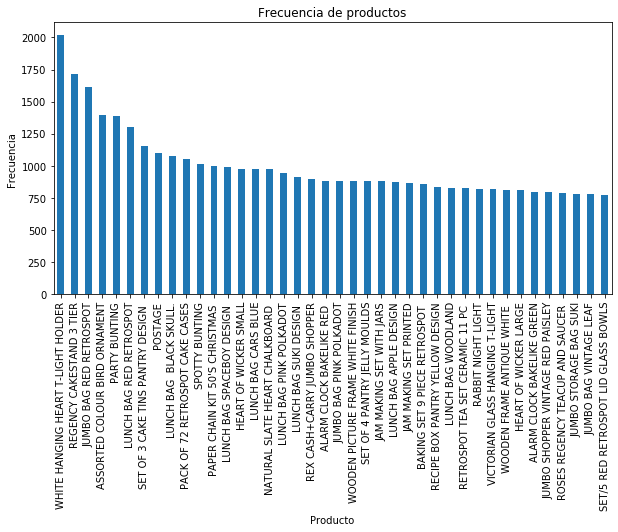

In [7]:
print("######### Análisis 2D #########")
#Histograma: Frecuencia de aparición de variables en un intervalo
print("Histograma de Frecuencia de los Productos")
df_bd_nueva_final.Description.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Frecuencia de productos")
plt.ylabel('Frecuencia')
plt.xlabel('Producto');
plt.show()
#Se muestra en pantalla el Histograma de Frecuencia
##############

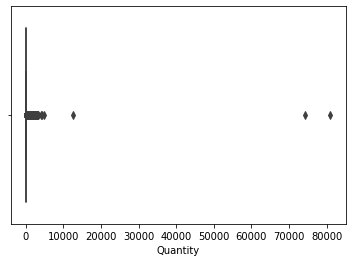

In [12]:

sns.boxplot(x=df_bd_nueva_final['Quantity'])


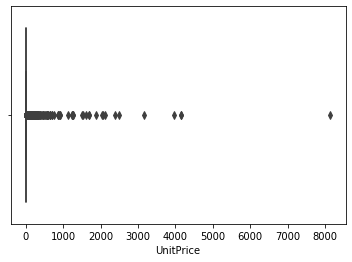

In [9]:
sns.boxplot(x=df_bd_nueva_final['UnitPrice'])

Histograma de Frecuencia de los Paises


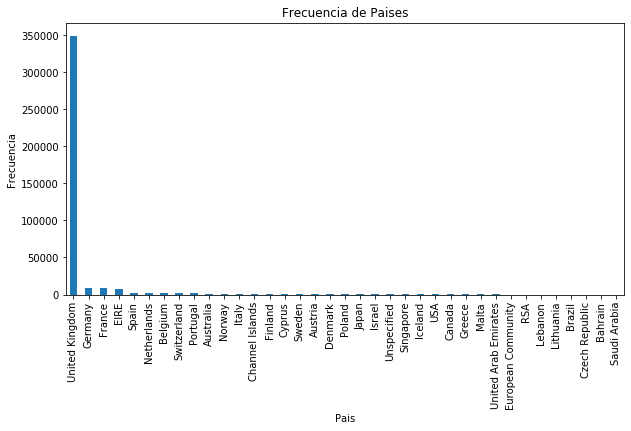

Histograma de Frecuencia por Cantidad de Productos


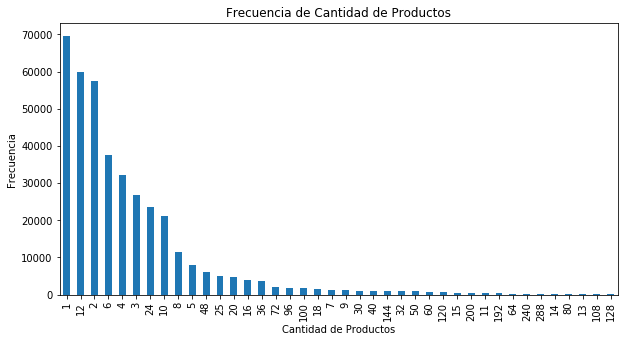

Se visualiza el Mapa de calor
Se visualiza el Diagrama de dispersión


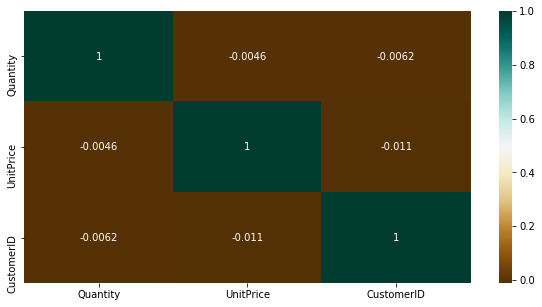

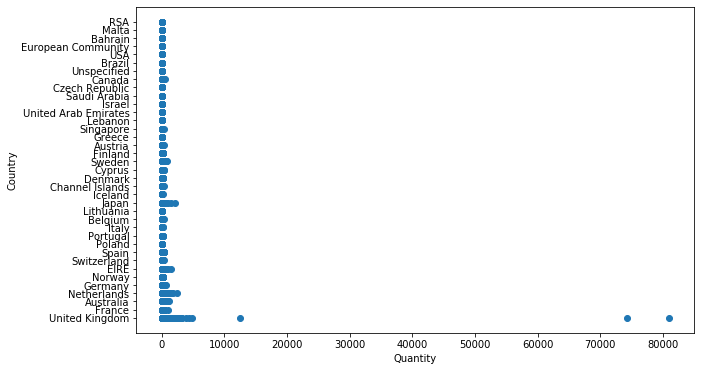

In [7]:
print("Histograma de Frecuencia de los Paises")
df_bd_nueva_final.Country.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Frecuencia de Paises")
plt.ylabel('Frecuencia')
plt.xlabel('Pais');
plt.show()

print("Histograma de Frecuencia por Cantidad de Productos")
df_bd_nueva_final.Quantity.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Frecuencia de Cantidad de Productos")
plt.ylabel('Frecuencia')
plt.xlabel('Cantidad de Productos');
plt.show()


#Mapas de calor: Necesario para encontrar variables dependientes de otra(s)
print("Se visualiza el Mapa de calor")
plt.figure(figsize=(10,5))
Mapa_calor= df_bd_nueva_final.corr()
sns.heatmap(Mapa_calor,cmap="BrBG",annot=True)
#Mapa_calor#Muestra en pantalla el Mapa de Calor
###############


#Scatterplot (Diagrama de dispersión) para encontrar la correlación entre dos variables
#Debe ser algo como "a mas valor de x, mayor valor de Y..."
print("Se visualiza el Diagrama de dispersión")
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df_bd_nueva_final['Quantity'], df_bd_nueva_final['Country'])
ax.set_xlabel('Quantity')
ax.set_ylabel('Country')
plt.show()#Muestra en pantalla el Diagrama de dispersión
###############